In [1]:
using Revise
using Bilevel

using RigidBodyDynamics
using MeshCatMechanisms
using MeshCat
using Plots
using LinearAlgebra
using StaticArrays

gr(size=(800,500),html_output_format=:png,
    seriescolor=:magma,background_color_legend=:white,
    background=RGB(((240,240,240) ./ 255.)...));

┌ Info: Precompiling Bilevel [9688c538-179f-11e9-3174-495cea6b7f67]
└ @ Base loading.jl:1186


HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/ac453cbe1838fe7a6d3794b312bfa72db072de98-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/ac453cbe1838fe7a6d3794b312bfa72db072de98-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

┌ Error: evaluation error
│   mod = Bilevel
│   ex = const usrfun = #= /Users/blandry/.julia/dev/Bilevel/src/solvers/snopt.jl:154 =# @cfunction(objcon_wrapper, Cvoid, (Ptr{Clong}, Ref{Clong}, Ptr{Cdouble}, Ref{Clong}, Ref{Clong}, Ptr{Cdouble}, Ref{Clong}, Ref{Clong}, Ptr{Cdouble}, Ptr{Cchar}, Ref{Clong}, Ptr{Clong}, Ref{Clong}, Ptr{Cdouble}, Ref{Clong}))
│   exception = (ErrorException("invalid lookup expr (\$(QuoteNode(Core.svec)))(JuliaInterpreter.SSAValue(2), JuliaInterpreter.SSAValue(3), JuliaInterpreter.SSAValue(4), JuliaInterpreter.SSAValue(5), JuliaInterpreter.SSAValue(6), JuliaInterpreter.SSAValue(7), JuliaInterpreter.SSAValue(8), JuliaInterpreter.SSAValue(9), JuliaInterpreter.SSAValue(10), JuliaInterpreter.SSAValue(11), JuliaInterpreter.SSAValue(12), JuliaInterpreter.SSAValue(13), JuliaInterpreter.SSAValue(14), JuliaInterpreter.SSAValue(15), JuliaInterpreter.SSAValue(16))"), Union{Ptr{Nothing}, InterpreterIP}[Ptr{Nothing} @0x0000000108228572, Ptr{Nothing} @0x00000001081ff71d, 

# Contact

## Single point with contact

In [2]:
urdf = joinpath("..", "urdf", "ball.urdf")
mechanism = parse_urdf(Float64, urdf)

floor = findbody(mechanism, "floor")
point = Point3D(default_frame(floor), SVector([0.,0.,0.]...))
normal = FreeVector3D(default_frame(floor), SVector([0.,0.,1.]...))
floor_obs = Obstacle(floor, point, normal, :xyz, 1.)

obstacles = [floor_obs]
env = Environment(mechanism, urdf, obstacles)

Environment(Contact[Contact(Spanning tree:
Vertex: world (root)
  Vertex: floor, Edge: floor_to_world
    Vertex: ball, Edge: floor_to_ball
No non-tree joints., ball, Point3D in "after_floor_to_ball": [0.0, 0.0, 0.0], Obstacle(floor, Point3D in "after_floor_to_world": [0.0, 0.0, 0.0], FreeVector3D in "after_floor_to_world": [0.0, 0.0, 1.0], [1.0 6.12323e-17 -1.0 -1.83697e-16; 0.0 1.0 1.22465e-16 -1.0; 0.0 0.0 0.0 0.0], 1.0, false))])

In [61]:
sim_data = get_sim_data_indirect(mechanism,env,.005,relax_comp=false)
control! = (u,t,x) -> u[:] .= 0.
state0 = MechanismState(mechanism)
set_velocity!(state0, [0.,0.,0.,.3,0.,0.])
sim = Bilevel.simulate(sim_data,control!,state0,10)

(Array{Float64,1}[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, -3.23117e-27, 0.00125475, -6.31089e-30, 0.0], [1.0, 0.0, -6.01671e-8, -1.29247e-26, 0.00226425, -3.78653e-29, 0.0], [1.0, 0.0, -1.8048e-7, 1.09427e-13, 0.0030285, 2.9699e-20, 0.0], [1.0, 0.0, -3.00793e-7, 1.09427e-13, 0.0035475, 2.9699e-20, 0.0], [1.0, 0.0, -4.21106e-7, 1.09427e-13, 0.00382125, 2.9699e-20, 0.0], [1.0, 0.0, -5.4142e-7, 1.09427e-13, 0.00384976, 2.9699e-20, 0.0], [1.0, -1.05137e-16, -6.19973e-5, 8.546e-15, 0.00384976, -9.10145e-17, 0.0], [1.0, -1.05137e-16, -0.000123453, 8.546e-15, 0.00384976, -2.45091e-13, 0.0], [1.0, -1.05137e-16, -0.000184909, 8.546e-15, 0.00384976, -2.45091e-13, 0.0]], Array{Float64,1}[[0.0, 0.0, 0.0, 0.3, 0.0, 0.0], [0.0, 0.0, -8.27181e-25, 0.25095, 0.0, -1.93738e-11], [0.0, -2.40668e-5, -3.30872e-24, 0.2019, 0.0, -3.01979e-8], [0.0, -4.81252e-5, -2.73517e-16, 0.15285, 6.21592e-18, -6.69756e-8], [0.0, -4.81252e-5, -2.73517e-16, 0.1038, 6.21592e-18, -7.42475e-8], [0.0, -4.81252e-5,

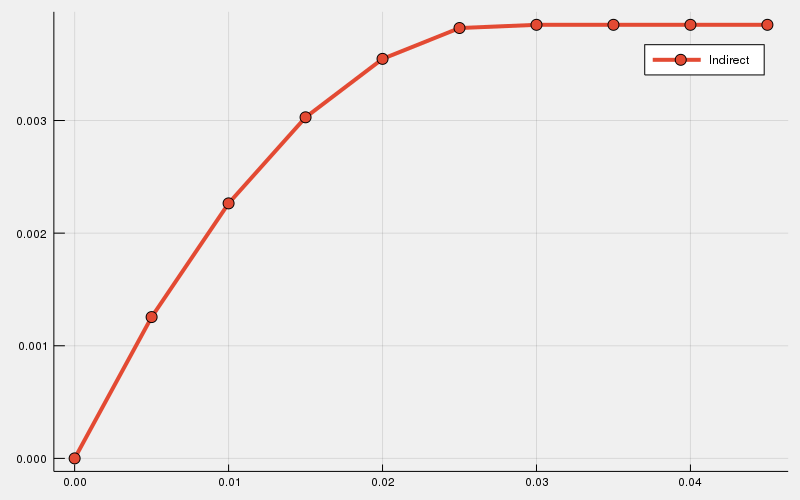

In [62]:
plot(sim[6],sim[7][5,:],label="Indirect",seriescolor=RGB(((227,74,51) ./ 255.)...),linewidth=4,marker=6)

In [65]:
sim[1][end]

7-element Array{Float64,1}:
  0.9999999772391998    
 -1.0513738975687836e-16
 -0.00018490913818571626
  8.546002609505338e-15 
  0.003849755372440942  
 -2.4509101539819656e-13
  0.0                   

In [98]:
q1 = [1., 0., 0., 0., 0., 0., 0.]
qN = [1., 0., 0., 0., .004, 0., 0.]
N = 10
Δt = .005

function add_prob_constraints!(sim_data)
    vs = sim_data.vs

    add_eq!(sim_data, :cq1, length(q1), x -> vs(x, :q1) - q1)
    add_eq!(sim_data, :cqN, length(qN), x -> vs(x, Symbol("q", N)) - qN)
    add_eq!(sim_data, :cv1, 1, x -> vs(x, :v1)[6])
    add_eq!(sim_data, :cvN, 1, x -> vs(x, Symbol("v", N))[4])

    add_box_con!(sim_data, :u, :u, zeros(num_velocities(mechanism)), zeros(num_velocities(mechanism)), 1:N-1)
    add_box_con!(sim_data, :hbox, :h, 1. * [Δt], 1. * [Δt], 1:N-1)
end

add_prob_constraints! (generic function with 1 method)

In [99]:
sim_data = get_trajopt_data_indirect(mechanism,env,Δt,N,relax_comp=false)
add_prob_constraints!(sim_data)
traj_indirect = Bilevel.trajopt(sim_data, quaternion_state=true, verbose=1)

Finished successfully: optimality conditions satisfied


(Array{Float64,1}[[1.0, -1.36315e-13, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, -1.36315e-13, 0.000111996, -3.73908e-18, 0.00128011, -8.05589e-13, 7.58708e-16], [1.0, -1.36315e-13, 0.000384679, -1.24278e-16, 0.00231483, -1.61118e-12, -5.0843e-20], [1.0, -1.36315e-13, 0.000576551, -8.45732e-17, 0.00310422, -2.41678e-12, 5.32473e-15], [1.0, 1.88537e-12, 0.00084813, 3.23266e-9, 0.00364821, -1.63588e-12, 0.0], [0.999999, 5.17756e-12, 0.00134661, 8.99917e-9, 0.00394671, 1.97632e-12, 6.46235e-27], [0.999999, -1.99561e-12, 0.00124707, -2.40921e-9, 0.004, -1.41667e-14, 2.32707e-11], [1.0, 0.0, 0.000826125, 0.0, 0.004, -1.80982e-17, 0.0], [1.0, 0.0, 0.000411403, 0.0, 0.004, 2.45e-13, 4.03184e-14], [1.0, 0.0, 0.0, 0.0, 0.004, 0.0, 0.0]], Array{Float64,1}[[0.0, 0.0, 0.0, 0.305082, -1.61118e-10, 0.0], [0.0, 0.0447985, 0.0, 0.256021, -1.61118e-10, 5.73468e-5], [0.0, 0.109073, 0.0, 0.206945, -1.61118e-10, 0.000159215], [0.0, 0.0767474, 0.0, 0.157875, -1.61118e-10, 0.000182046], [0.0, 0.108632, 1.29306e-6, 0.1

In [ ]:
sim_data = get_trajopt_data_semidirect(mechanism,env,Δt,N,relax_comp=false)
add_prob_constraints!(sim_data)
traj_semidirect = Bilevel.trajopt(sim_data, quaternion_state=true, verbose=1)

In [ ]:
j = 5
plot(traj_indirect[7],traj_indirect[8][j,:],label="Indirect",seriescolor=RGB(((227,74,51) ./ 255.)...),linewidth=4,marker=6)
plot!(traj_semidirect[7],traj_semidirect[8][j,:],label="Semidirect",seriescolor=RGB(((254,232,200) ./ 255.)...),linewidth=0,marker=4)

## Little dog

In [ ]:
urdf = joinpath("..", "urdf", "little_dog", "little_dog.urdf")
mechanism = parse_urdf(Float64, urdf)

floor = findbody(mechanism, "floor")
point = Point3D(default_frame(floor), SVector([0.,0.,0.]...))
normal = FreeVector3D(default_frame(floor), SVector([0.,0.,1.]...))
floor_obs = Obstacle(floor, point, normal, :xyz, 1.)

obstacles = [floor_obs]
env = Environment(mechanism, urdf, obstacles);

In [ ]:
mass(mechanism) * 9.81

In [ ]:
q_nom = [1., 0., 0., 0., 0., 0., .175, 0., 0., 0., 0., .036, 0., 0., 0., .00758, 0., .002445, 0.]  
q_min = [-1., -1., -1., -1., -.1, -.01, .05, -.6, -.6, -.6, -.6, -3.5, -3.5, -3.5, -3.5, -3.1, -3.1, -3.1, -3.1]
q_max = [1., 1., 1., 1., 5., .01, .2, .6, .6, .6, .6, 2.4, 2.4, 2.4, 2.4, 1., 1., 1., 1.]

N = 10
Δt = .05

function add_prob_constraints!(sim_data)
    vs = sim_data.vs

    add_eq!(sim_data, :cq1, num_positions(mechanism), x -> vs(x, :q1) - q_nom)
    add_eq!(sim_data, :cv1, num_velocities(mechanism), x -> vs(x, :v1))
end

function add_prob_obj!(sim_data)
    add_obj!(sim_data, :xf, x -> -sim_data.vs(x, Symbol("q", N))[5])
end

function get_prob_limits(sim_data)
    x_min = -1e19*ones(sim_data.vs.num_vars)
    x_max = 1e19*ones(sim_data.vs.num_vars)
    
    # joint limits
    add_box_con_snopt!(x_min, x_max, sim_data, :q, q_min, q_max, 1:N)
    add_box_con_snopt!(x_min, x_max, sim_data, :h, [.5 * Δt], [2. * Δt], 1:N-1)
    
    # torques limits
    u_limit = .5
    add_box_con_snopt!(x_min, x_max, sim_data, :u, -u_limit * ones(num_velocities(mechanism)), u_limit * ones(num_velocities(mechanism)), 1:N-1)

    x_min, x_max
end

function get_prob_init(sim_data)
    x0 = zeros(sim_data.vs.num_vars)
    for n = 1:N
        x0[sim_data.vs(Symbol("q", n))] .= q_nom
    end
    
    x0
end

function setup_prob!(sim_data)
    add_prob_constraints!(sim_data)
    add_prob_obj!(sim_data)
    x_min, x_max = get_prob_limits(sim_data)
    x0 = get_prob_init(sim_data)
    
    x0, x_min, x_max
end

In [ ]:
mvis = MechanismVisualizer(mechanism, URDFVisuals(urdf));
open(mvis)

In [ ]:
sim_data = get_trajopt_data_indirect(mechanism,env,Δt,N,relax_comp=false)
x0, x_min, x_max = setup_prob!(sim_data)
traj_indirect = Bilevel.trajopt(sim_data, x0=x0, x_min=x_min, x_max=x_max, verbose=1, opt_tol=1e-3, major_feas=1e-3, minor_feas=1e-3);

In [ ]:
setanimation!(mvis, traj_indirect[7], traj_indirect[1])

In [ ]:
sim_data = get_trajopt_data_semidirect(mechanism,env,Δt,N,relax_comp=false)
x0, x_min, x_max = setup_prob!(sim_data)
traj_semidirect = Bilevel.trajopt(sim_data, x0=x0, x_min=x_min, x_max=x_max, verbose=1, opt_tol=1e-3, major_feas=1e-3, minor_feas=1e-3);

In [ ]:
setanimation!(mvis, traj_semidirect[7], traj_semidirect[1])

## Panda arm